In [2]:
import os
os.chdir("/data/t-achetan/adv_geom/src/")
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader
import numpy as np


from sklearn.calibration import calibration_curve, CalibrationDisplay

import expB.learn_mfld_distance as lmd
from expB.myNNs import MTMLPwithNormalisation
from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres

16-05-2022 15:02:42 -- [I] faiss.loader >> Loading faiss with AVX2 support.
16-05-2022 15:02:42 -- [I] faiss.loader >> Successfully loaded faiss with AVX2 support.


# Distance Learner

In [ ]:
dump_dir = "/data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfldv3_bs4096_highmn40_inferred_maxtdelta_5e-3/2/logits/val/"


targets_fn = os.path.join(dump_dir, "targets.pt")
targets = torch.load(targets_fn)
logits_fn = os.path.join(dump_dir, "logits.pt")
logits = torch.load(logits_fn)


In [ ]:
gt_distance, gt_labels = torch.min(targets, dim=1)

In [ ]:
pred_distance, pred_labels = torch.min(logits, dim=1)

In [ ]:
label_name = 1
thresh = 0.15

chunks = np.arange(0.01, 1.01, 0.01)
chunks_cumtot = np.zeros(chunks.shape[0])
chunks_cumcor = np.zeros(chunks.shape[0])
chunks_cumacc = np.zeros(chunks.shape[0])

for i in range(len(chunks)):
    
    max_dist = chunks[i]
    label_pred_dists = logits[:, label_name]
    label_pred_labels = torch.zeros(label_pred_dists.shape[0]).long() + label_name
    label_pred_labels[label_pred_dists > thresh] = 2
    
    label_gt_dists = targets[:, label_name]
    label_gt_labels = torch.zeros(label_gt_dists.shape[0]).long() + label_name
    label_gt_labels[label_gt_dists > thresh] = 2
    
    chunks_cumtot[i] = logits[(logits[:, label_name] <= chunks[i]) & (label_pred_labels == label_name)].shape[0]
    
    chunks_cumcor[i] = logits[(logits[:, label_name] <= chunks[i]) & (label_pred_labels == label_name) & (label_gt_labels == label_pred_labels)].shape[0]
    chunks_cumacc[i] = chunks_cumcor[i] / (chunks_cumtot[i])
    
plt.plot(chunks, chunks_cumacc)
plt.scatter(chunks, chunks_cumacc, s=0.01)
plt.show()
    

In [ ]:
chunks_cumacc

In [ ]:
chunks

# Standard Classifier

In [3]:
common_prefix = "/data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/"
name = "rdm_concspheres_k50n500_noninfdist_moreoffmfld_advtraindebug_eps=1e-1"
run_id = "1"
model_fn = os.path.join(common_prefix, name, run_id, "models", "ckpt.pth")
model_dump = torch.load(model_fn)

In [3]:
model = MTMLPwithNormalisation(
    input_size=500,
    output_size=2,
    use_tanh=False,
    use_relu=False,
    weight_norm=False
)
model.load_state_dict(model_dump["model_state_dict"])

<All keys matched successfully>

In [4]:
data_dir = os.path.join(common_prefix, name, "data", "val")
dset = ConcentricSpheres()
dset.load_data(data_dir)

13-05-2022 16:37:15 -- [I] root >> [ConcentricSpheres]: data attribute (_x_ck) loaded from file: /data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfld_advtraindebug_eps=1e-1/data/val/_x_ck.pkl
13-05-2022 16:37:15 -- [I] root >> [ConcentricSpheres]: data attribute (_x_cn) loaded from file: /data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfld_advtraindebug_eps=1e-1/data/val/_x_cn.pkl
13-05-2022 16:37:15 -- [I] root >> [ConcentricSpheres]: data attribute (_rotation) loaded from file: /data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfld_advtraindebug_eps=1e-1/data/val/_rotation.pkl
13-05-2022 16:37:15 -- [I] root >> [ConcentricSpheres]: data attribute (_translation) loaded from file: /data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoff

13-05-2022 16:37:17 -- [I] root >> [RandomSphere]: data attribute (normed_actual_distances) loaded from file: /data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfld_advtraindebug_eps=1e-1/data/val/S1_dump/normed_actual_distances.pkl
13-05-2022 16:37:17 -- [I] root >> [RandomSphere]: data attribute (x_ck) loaded from file: /data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfld_advtraindebug_eps=1e-1/data/val/S1_dump/x_ck.pkl
13-05-2022 16:37:17 -- [I] root >> [RandomSphere]: data attribute (x_cn_trivial_) loaded from file: /data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfld_advtraindebug_eps=1e-1/data/val/S1_dump/x_cn_trivial_.pkl
13-05-2022 16:37:17 -- [I] root >> [RandomSphere]: data attribute (x_cn_tr_) loaded from file: /data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/

In [6]:
new_data_config_1 = {
    "N": 200000,
    "num_neg": 100000,
    "n": 500,
    "k": 50,
    "r": 2.0,
    "g": 0.3,
    "D": 0.07,
    "max_norm": 0.1,
    "mu": 0,
    "sigma": 1,
    "seed": 191919,
    "normalize": True,
    "norm_factor": 1,
    "bp": 0.09,
    "M": 1,
    "inferred": False,
    "online": False,
    "off_online": False,
    "augment": False,
    "gamma": 0,
    "cache_dir": "/mnt/t-achetan/data_cache/train/",
    "translation": dset.translation,
    "rotation": dset.rotation,
    "x_ck": dset.x_ck
    
}

new_dset_1 = ConcentricSpheres(**new_data_config_1)

In [7]:
new_dset_1.compute_points()

13-05-2022 16:37:46 -- [I] root >> [RandomSphere]: generated centre
13-05-2022 16:37:46 -- [I] root >> [RandomSphere]: generated points in k-dim
13-05-2022 16:37:46 -- [I] root >> [RandomSphere]: pre-images generated
13-05-2022 16:37:48 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
13-05-2022 16:37:49 -- [I] root >> [RandomSphere]: normalization complete
13-05-2022 16:37:49 -- [I] root >> [ConcentricSpheres]: Generated S1
13-05-2022 16:37:49 -- [I] root >> [RandomSphere]: generated centre
13-05-2022 16:37:49 -- [I] root >> [RandomSphere]: generated points in k-dim
13-05-2022 16:37:49 -- [I] root >> [RandomSphere]: pre-images generated
13-05-2022 16:37:53 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
13-05-2022 16:37:55 -- [I] root >> [RandomSphere]: normalization complete
13-05-2022 16:37:55 -- [I] root >> [ConcentricSpheres]: Generated S2
13-05-2022 16:37:57 -- [I] root >> [ConcentricSpheres]: Overall noramalization done


In [8]:
dloader_1 = DataLoader(new_dset_1, batch_size=4096, num_workers=8, shuffle=False)

acc_1, f1_1, all_targets_1, all_logits_1 = lmd.test(
    model,
    dloader_1,
    task="clf",
    feature_name="normed_points",
    target_name="classes",
    device=torch.device("cuda:0")
)


In [10]:
new_data_config_2 = {
    "N": 200000,
    "num_neg": 100000,
    "n": 500,
    "k": 50,
    "r": 0.7,
    "g": 0.3,
    "D": 0.07,
    "max_norm": 0.15,
    "mu": 0,
    "sigma": 1,
    "seed": 167,
    "normalize": True,
    "norm_factor": 1,
    "bp": 0.09,
    "M": 1,
    "inferred": False,
    "online": False,
    "off_online": False,
    "augment": False,
    "gamma": 0,
    "cache_dir": "/mnt/t-achetan/data_cache/train/",
    "translation": dset.translation,
    "rotation": dset.rotation,
    "x_ck": dset.x_ck
    
}

new_dset_2 = ConcentricSpheres(**new_data_config_2)
new_dset_2.compute_points()

13-05-2022 16:38:51 -- [I] root >> [RandomSphere]: generated centre
13-05-2022 16:38:51 -- [I] root >> [RandomSphere]: generated points in k-dim
13-05-2022 16:38:51 -- [I] root >> [RandomSphere]: pre-images generated
13-05-2022 16:38:54 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
13-05-2022 16:38:55 -- [I] root >> [RandomSphere]: normalization complete
13-05-2022 16:38:55 -- [I] root >> [ConcentricSpheres]: Generated S1
13-05-2022 16:38:55 -- [I] root >> [RandomSphere]: generated centre
13-05-2022 16:38:55 -- [I] root >> [RandomSphere]: generated points in k-dim
13-05-2022 16:38:56 -- [I] root >> [RandomSphere]: pre-images generated
13-05-2022 16:38:58 -- [I] root >> [RandomSphere]: embedded the sphere in n-dim space
13-05-2022 16:38:59 -- [I] root >> [RandomSphere]: normalization complete
13-05-2022 16:38:59 -- [I] root >> [ConcentricSpheres]: Generated S2
13-05-2022 16:39:01 -- [I] root >> [ConcentricSpheres]: Overall noramalization done


In [11]:
dloader_2 = DataLoader(new_dset_2, batch_size=4096, num_workers=8, shuffle=False)

acc_2, f1_2, all_targets_2, all_logits_2 = lmd.test(
    model,
    dloader_2,
    task="clf",
    feature_name="normed_points",
    target_name="classes",
    device=torch.device("cuda:0")
)

In [12]:
all_targets_1[:] = 1
all_targets_2[:] = 0

In [17]:
all_targets = torch.zeros(all_targets_1.shape[0] + all_targets_2.shape[0])
all_targets[:all_targets_1.shape[0]] = all_targets_1
all_targets[all_targets_1.shape[0]:] = all_targets_2
all_targets = all_targets.long()

all_logits = torch.zeros(all_logits_1.shape[0] + all_logits_2.shape[0], all_logits_1.shape[1])
all_logits[:all_logits_1.shape[0]] = all_logits_1
all_logits[all_logits_1.shape[0]:] = all_logits_2

In [3]:
dump_dir = "/data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfldv3_bs4096_highmn40/1/attack_perf/atk_flavor=std_pgd,atk_routine=my,eps=0.08,eps_iter=0.005,nb_iter=100,norm=2,restarts=1,verbose=False,task=dist/"

logits_and_advex = torch.load(os.path.join(dump_dir, "logits_and_advex.pt"))

# targets_fn = os.path.join(dump_dir, "targets.pt")
# targets = torch.load(targets_fn)
# logits_fn = os.path.join(dump_dir, "logits.pt")
# logits = torch.load(logits_fn)


In [4]:
targets = logits_and_advex["all_deltas"]
targets = torch.norm(targets, dim=1)
tmp = torch.zeros(targets.shape[0], 2)
tmp[:50000, 0] = targets[:50000]
tmp[:50000, 1] = 1
tmp[50000:, 1] = targets[50000:]
tmp[50000:, 0] = 1
targets = tmp
logits = logits_and_advex["logits_of_pb_ex"]

# targets = all_targets
# logits = all_logits

In [5]:
logits_and_advex.keys()

dict_keys(['logits_of_pb_ex', 'all_pb_ex', 'all_deltas', 'logits_of_raw_ex', 'all_targets'])

In [6]:
thresh = 0.14
gt_dists, gt_labels = torch.min(targets, dim=1)
gt_labels[gt_dists > thresh] = 2
pred_dists, pred_labels = torch.min(logits, dim=1)
pred_labels[pred_dists > thresh] = 2

In [7]:
pred_dists, pred_labels

(tensor([0.1232, 0.1220, 0.1228,  ..., 0.1205, 0.1205, 0.1218]),
 tensor([0, 0, 0,  ..., 1, 1, 1]))

In [10]:
np.unique(pred_labels, return_counts=True)

(array([0, 1, 2]), array([52716, 46547,   737]))

In [8]:
from sklearn.metrics import classification_report
print(classification_report(gt_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     50000
           1       1.00      0.93      0.96     50000
           2       0.00      0.00      0.00         0

    accuracy                           0.96    100000
   macro avg       0.65      0.64      0.65    100000
weighted avg       0.97      0.96      0.97    100000



/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
! ls "/data/t-achetan/dumps/expC_dist_learner_for_adv_ex/rdm_concspheres_test/rdm_concspheres_k50n500_noninfdist_moreoffmfldv3_bs4096/2/attack_perf/atk_flavor=std_pgd,atk_routine=my,eps=0.09999999999999999,eps_iter=0.005,nb_iter=100,norm=2,restarts=1,verbose=False,task=clf/"

In [19]:
(targets == 1).all()

tensor(False)

In [15]:
gt_labels = targets
pred_prob, pred_labels = torch.max(logits, dim=1)
gt_prob = torch.zeros(gt_labels.shape[0], 2)
# gt_prob[:, targets.reshape(-1, 1)] = 1


In [16]:
gt_prob[np.arange(targets.shape[0]), targets] = 1
gt_prob[-10:], logits[-10:]

IndexError: tensors used as indices must be long, byte or bool tensors

In [20]:
(torch.max(all_logits, dim=1)[1] == all_targets).all()

tensor(True)

In [21]:
all_targets, torch.max(all_logits, dim=1)[1]

(tensor([1, 1, 1,  ..., 0, 0, 0]), tensor([1, 1, 1,  ..., 0, 0, 0]))

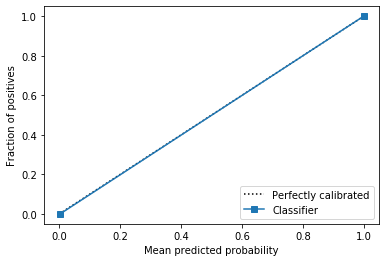

In [22]:
CalibrationDisplay.from_predictions(gt_labels.numpy(), logits[:, 1].numpy(), n_bins=5)

In [ ]:
label_name = 0
thresh = 0.15

chunks = np.arange(0.0, 1.01, 0.01)
chunks_cumtot = np.zeros(chunks.shape[0])
chunks_cumcor = np.zeros(chunks.shape[0])
chunks_cumacc = np.zeros(chunks.shape[0])

for i in range(1, len(chunks)):
    
    max_conf = chunks[i]
    label_pred_conf = logits[:, label_name]
    label_pred_labels = torch.zeros(label_pred_conf.shape[0]).long() + label_name
    label_pred_labels[label_pred_conf < thresh] = 1 - label_name
    
    
    label_gt_labels = torch.zeros(gt_labels.shape[0]).long() + label_name
    
    chunks_cumtot[i] = logits[(logits[:, label_name] <= chunks[i]) & (label_pred_labels == label_name)].shape[0]
    
    chunks_cumcor[i] = logits[(logits[:, label_name] <= chunks[i]) & (label_pred_labels == label_name) & (label_gt_labels == label_pred_labels)].shape[0]
    chunks_cumacc[i] = chunks_cumcor[i] / (chunks_cumtot[i] + 1)
    
plt.plot(chunks, chunks_cumacc)
plt.scatter(chunks, chunks_cumacc, s=0.01)
plt.show()



In [ ]:
chunks

In [ ]:
chunks_cumacc

In [ ]:
y_test

In [ ]:
np.unique([1, 2, 3])